# Exploration, visualizations and machine learning models of data frame consisting of all kinds of extracted data merged together 

# Imports

In [3]:
import joblib 

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd
from pandas.plotting import scatter_matrix

import pickle

from scipy.stats import pearsonr
from scipy.stats import shapiro

import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn import metrics


from bi_functions_tobias import calculate_outliers, train_linear_model, train_linear_model_xy

# Loading data frame from file

In [5]:
file_name = 'dataframes.h5'
key = "all_df"

df = pd.read_hdf(file_name, key)

# 1) Exploration of data

### 1.1) Getting an overview

Here I'm simply getting an overview of the data to have in mind for further analysis.

1) First I check the five first rows to be reminded which columns I have in this data frame and which values they contain 
  
2) Next I'm getting some info about the data to be reminded how many rows there is in this data frame and to be sure that the data type of each column is correct  
  
3) Third I'm checking the some descriptive measures of the data. This is to get a sense of the data's statistical measures like it's distribution, it's skewness and it's outliers. 

In [9]:
df.head()

,Country,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Social expenditure as % of GDP,Total taxation in %,Difference 2012-2022 (pp),Unemployment as percentage of labour force
0,Austria,2012,7.400689,10.883644,0.945142,70.099998,0.919704,0.113814,0.770586,0.712150,0.156675,27.611,41.870248,1.3,5.2
1,Austria,2013,7.498803,10.878005,0.949809,70.199997,0.921734,0.164263,0.678937,0.725053,0.162603,28.031,42.740210,1.3,5.7
2,Austria,2014,6.950000,10.876781,0.898920,70.300003,0.885027,0.113623,0.566931,0.720965,0.170150,28.255,42.793747,1.3,6.0
3,Austria,2015,7.076447,10.875665,0.928110,70.400002,0.900305,0.094910,0.557480,0.747708,0.164469,28.261,43.211649,1.3,6.1
4,Austria,2016,7.048072,10.884549,0.926319,70.525002,0.888514,0.075823,0.523641,0.713451,0.197424,28.197,41.815396,1.3,6.5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, 0 to 221
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     222 non-null    object 
 1   Year                                        222 non-null    int64  
 2   Life Ladder                                 222 non-null    float64
 3   Log GDP per capita                          222 non-null    float64
 4   Social support                              222 non-null    float64
 5   Healthy life expectancy at birth            222 non-null    float64
 6   Freedom to make life choices                222 non-null    float64
 7   Generosity                                  222 non-null    float64
 8   Perceptions of corruption                   222 non-null    float64
 9   Positive affect                             222 non-null    float64
 10  Negative affect    

In [11]:
df.describe()

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Social expenditure as % of GDP,Total taxation in %,Difference 2012-2022 (pp),Unemployment as percentage of labour force
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,2016.851351,6.672462,10.698365,0.923627,70.004595,0.837925,-0.003740,0.610499,0.692529,0.231583,23.158275,37.558377,0.733333,7.524775
std,3.176622,0.720369,0.332050,0.030477,1.907560,0.110212,0.153919,0.251083,0.072181,0.053677,5.069975,5.749821,2.903823,3.857445
min,2012.000000,4.683358,10.084578,0.834023,64.699997,0.494475,-0.296868,0.150607,0.471466,0.131619,12.779000,19.778489,-7.400000,2.200000
25%,2014.000000,6.092345,10.437841,0.906042,68.993750,0.778085,-0.128663,0.391869,0.635734,0.194434,18.878250,33.936933,-0.400000,5.000000
50%,2017.000000,6.760653,10.695198,0.928582,70.750000,0.879947,-0.025067,0.640041,0.706806,0.219370,23.068500,37.747397,1.200000,6.800000
75%,2020.000000,7.319477,10.883091,0.945684,71.375000,0.920727,0.121368,0.846873,0.747967,0.258437,27.726000,42.455641,2.200000,8.900000
max,2022.000000,7.889350,11.663788,0.984940,72.275002,0.964561,0.327282,0.959288,0.825601,0.387652,34.876000,50.285574,5.300000,26.100000


### 1.2) Visualizing statistical distribution and relationships in the data

This again is to get an overview of the data but now focused on the descriptive statistics

1) First I want to see the distributions of the data and thereby the outliers and the medians through box plots  
  
2) Second I want to get a different visualization of the distributions of the data through histograms
  
3) Third I want to calculate and visualize all the correlations between the features of the data through a correlation matrix
  
This is all to get a sense of the data both for further analysis and use of the data and to estimate if I should be concerned about outliers. It also give me an idea of how I should interpret the central tendency measures like the mean and median  

##### Box plots

- I'm not showing box plots of the 'Country' and 'Year'columns because 'Country' is nominal data (so no distribution, mean and median) and I don't need any distribution of the 'Year'-data given that in this project I'm not concerned about how years are influencing the other features
  
- I'm standarzing the data to make the visualizations easier to interpret (without the standardization half of the box plots where squashed into flat boxes because of the different scales of the data) 

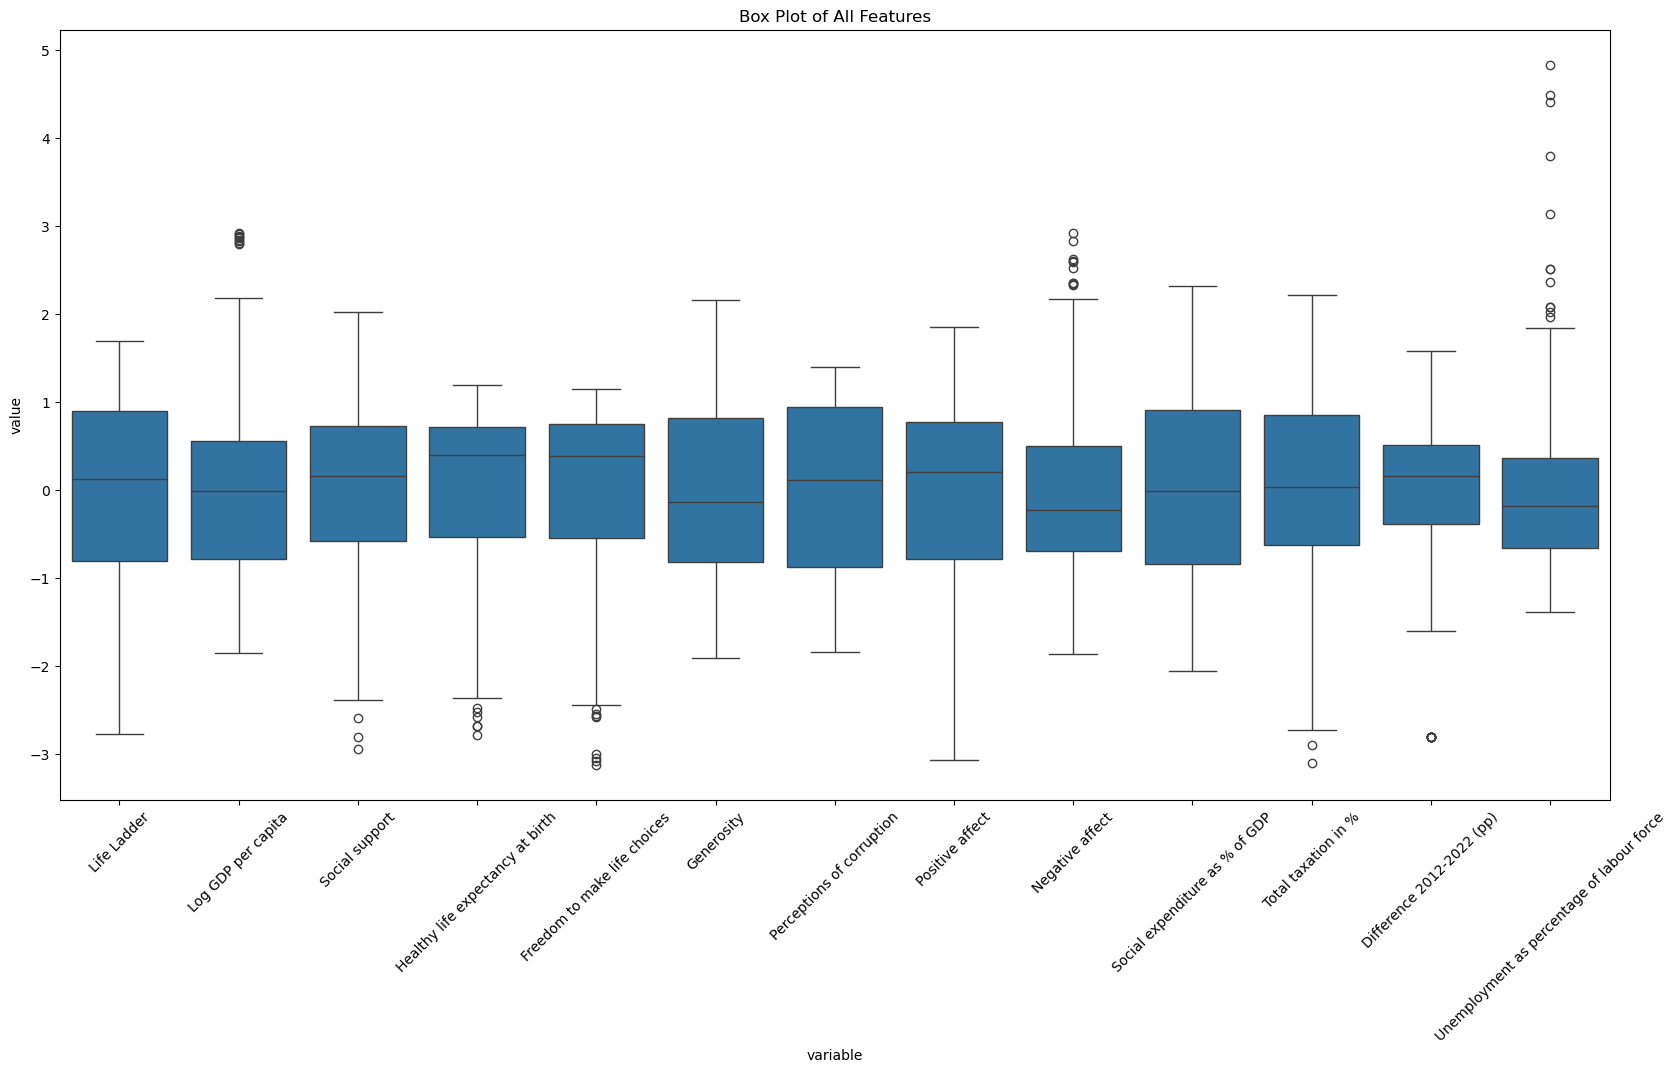

In [16]:
scaler = StandardScaler()

df_standardized = pd.DataFrame(scaler.fit_transform(df.drop(columns=["Country", "Year"])), columns=df.drop(columns=["Country", "Year"]).columns)

df_melted = df_standardized.melt()

plt.figure(figsize=(20, 10))
sns.boxplot(x='variable', y='value', data=df_melted)

plt.title("Box Plot of All Features")
plt.xticks(rotation=45) 
plt.show()

- I can see that 8 of the features has outliers
- The unemployment features seems to have the most outliers and some of them are very far away from the median and the interquartlie range. I will investigate that further later

##### Histograms

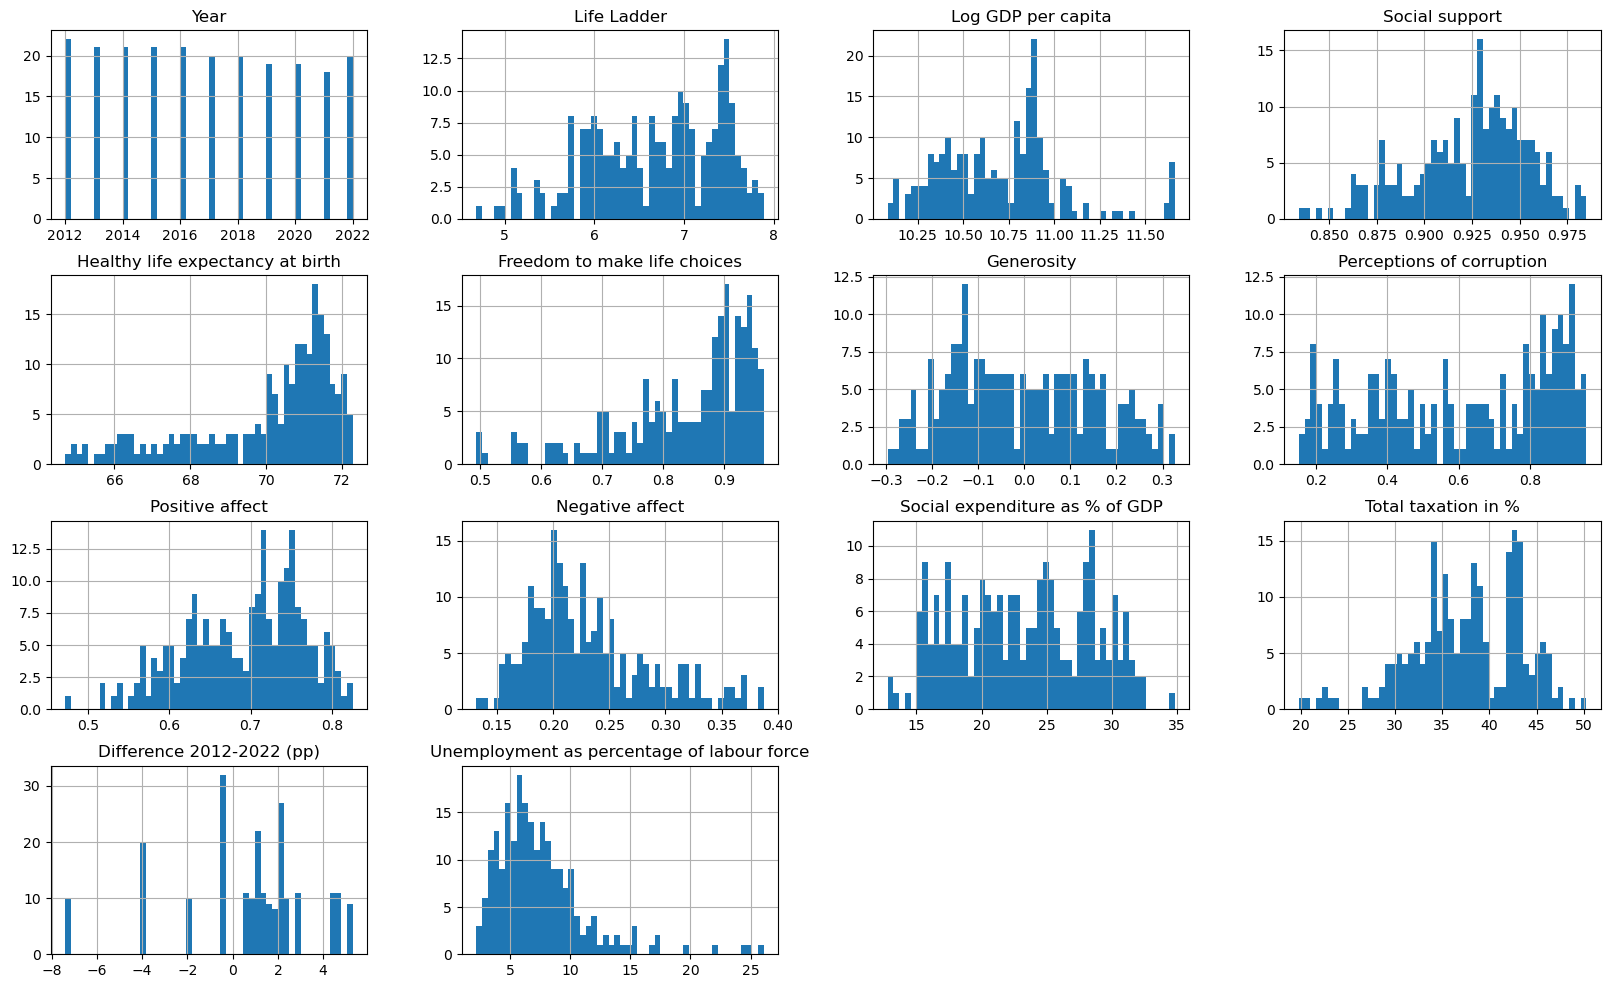

In [19]:
df.drop(columns="Country").hist(bins=50, figsize=(20, 12))

plt.show()

##### Correlation matrix

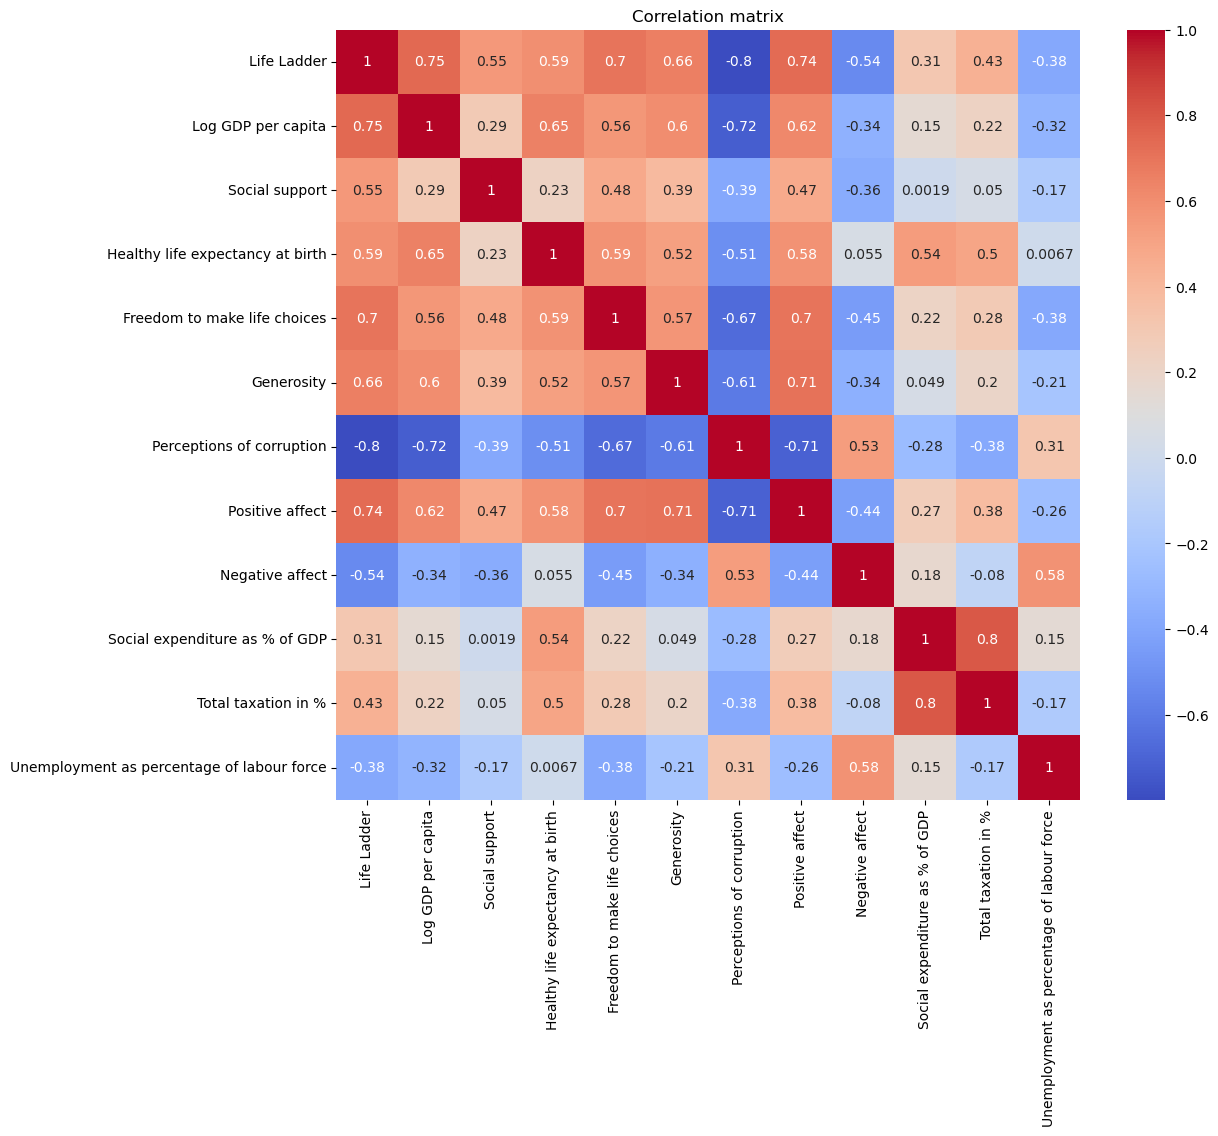

In [32]:
correlation_matrix = df.drop(columns= ["Country", "Year", "Difference 2012-2022 (pp)"]).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()